# Reference site
https://networkx.github.io/documentation/stable/tutorial.html#creating-a-graph

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Make graph

In [2]:
# create a empty graph with no nodes and no edges
G = nx.Graph()

# add Nodes

In [3]:
# add node 1
G.add_node(1)

In [4]:
# add a lists of nodes
# add node 2 and 3
node_lists = [2,3]
G.add_nodes_from(node_lists)

# add Edges

In [5]:
# add Edges
# node 1과 node2를 잇는다
G.add_edge(1,2)
e=(2,3)

# node 2와 node3을 잇는다
G.add_edge(*e)

G.add_edge(2,4)

In [6]:
# print number of nodes
print(G.number_of_nodes())

# print number of edges
print(G.number_of_edges())

4
3


# Graph의 기본 4가지 속성
1. nodes
2. edges
3. adj (adjacencies, neighbors)
4. degress

In [7]:
# G 의 node들을 list 형태로 print
print(list(G.nodes))

[1, 2, 3, 4]


In [8]:
# G의 edge들을 lsit 형태로 print
print(list(G.edges))

[(1, 2), (2, 3), (2, 4)]


In [9]:
# G의 adj print
# G.adj[1] = G[1]
print('adj[1]: ',list(G.adj[1]))
print('adj[2]: ',list(G.adj[2]))
print('adj[3]: ',list(G.adj[3]))

adj[1]:  [2]
adj[2]:  [1, 3, 4]
adj[3]:  [2]


In [10]:
# print degree
# 각 노드에 연결된 edges의 수 = degree
print(G.degree[1])
print(G.degree[2])
print(G.degree[3])

1
3
1


# specify to report the edges and degree using nbunch

# print edges using nbunch

In [11]:
# Print specific edges
# print edges contained 2 node
print( G.edges([2]))

[(2, 1), (2, 3), (2, 4)]


In [12]:
# []안에 여러 node를 넣을 수 있다
print( G.edges([1,3]))

[(1, 2), (3, 2)]


## print degree using nbunch

In [13]:
# G.degree([node name]) : node에 해당하는 degree를 출력
# result: (node name, degree)

print( G.degree([2]))
print( G.degree([2,3]))

[(2, 3)]
[(2, 3), (3, 1)]


# remove node and edges

In [14]:
F = nx.Graph()
F_node_lists = [1,2,3]
F.add_nodes_from(F_node_lists)

F.add_edge(1,2)
F.add_edge(2,3)

# remove node
# node에 연결되 있던 edge도 모두 사라진다
F.remove_node(3)

# tuple형태로 한 번에 노드 지우기
F.remove_nodes_from((1,2))
print(list(F.nodes))


#remove edge
'''
F.remove_edge(2,3)
print(list(F.edges))
'''

[]


'\nF.remove_edge(2,3)\nprint(list(F.edges))\n'

# DiGraph

In [15]:
# G를 가지고 방향성 있는 그래프로 바꾸기
H = nx.DiGraph(G)
print("H's edges: ",list(H.edges))
print("G's edges: ",list(G.edges))

H's edges:  [(1, 2), (2, 1), (2, 3), (2, 4), (3, 2), (4, 2)]
G's edges:  [(1, 2), (2, 3), (2, 4)]


# Create graph

In [16]:
edgelist = [ (0,1), (1,2), (2,3) ]
H = nx.Graph(edgelist)

print("H's edges: ",list(H.edges))
print("H's nodes: ",list(H.nodes))

H's edges:  [(0, 1), (1, 2), (2, 3)]
H's nodes:  [0, 1, 2, 3]


In [17]:
# G[1][2] = edge: (1,2)
# G.edges[1,2] = edge: (1,2)
G[1][2]['color'] = "blue"
G.edges[2,3]['color'] = "red"

# add weight & examine all adjacency pairs

In [18]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (3, 4, 0.375) ])

# FG is undirected Graph -> see edge twice
# 1이랑 연결된것, 2랑 연결된것... 이렇게 차례로 본다
for n, nbrs in FG.adj.items():
    # nbr: eattr
    print(nbrs)
    for nbr, eattr in nbrs.items():
        wt = eattr['weight']
        if wt < 0.5:
            print('(%d, %d, %.3f)' %(n, nbr, wt))

{2: {'weight': 0.125}, 3: {'weight': 0.75}}
(1, 2, 0.125)
{1: {'weight': 0.125}}
(2, 1, 0.125)
{1: {'weight': 0.75}, 4: {'weight': 0.375}}
(3, 4, 0.375)
{3: {'weight': 0.375}}
(4, 3, 0.375)


# examine all edges

In [19]:
# edge: (u, v)
for (u, v, wt) in FG.edges.data('weight'):
    if wt < 0.5:
        print('(%d, %d, %.3f)' %(u, v, wt))

(1, 2, 0.125)
(3, 4, 0.375)


# Adding attributes

## add Graph attributes

In [20]:
GA = nx.Graph(day="Friday")
print(GA.graph)

# modification of attributes
GA.graph['day'] = "Monday"
print(GA.graph)

{'day': 'Friday'}
{'day': 'Monday'}


## add Node attributes

In [21]:
# 새로운 노드를 추가하면서 attribute도 추가
G.add_node(4, time='5pm')

# 원래있던 1번 노드에 time attribute 추가
G.add_nodes_from([1], time='2pm')

print("node 1's attributes: ",G.nodes[1])

# 속성을 추가안해서 아무것도 안나옴
print("node 2's attributes: ",G.nodes[2])

# 아래와 같은 방식으로도 attribute 추가 가능 (이미 있는 node에 대해서만 가능)
G.nodes[1]['room'] = 714

print(G.nodes.data())

node 1's attributes:  {'time': '2pm'}
node 2's attributes:  {}
[(1, {'time': '2pm', 'room': 714}), (2, {}), (3, {}), (4, {'time': '5pm'})]


## add Edge attributes

In [22]:
G.add_edge(1, 2, weight=4.7)
G[2][3]['weight'] = 9.9

# 모든 edge들에 대한 데이터 출력
print(G.edges.data())

[(1, 2, {'color': 'blue', 'weight': 4.7}), (2, 3, {'color': 'red', 'weight': 9.9}), (2, 4, {})]


# Draw Graph

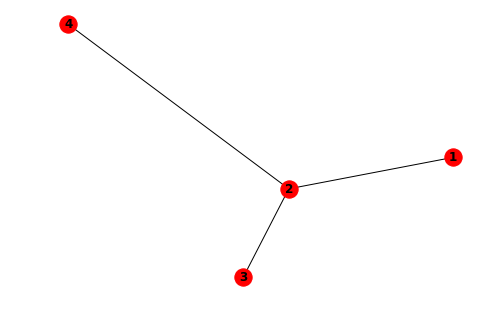

In [25]:
nx.draw(G, with_labels=True, font_weight='bold')

nodes:  ['VANESSA', 'DOPINDER', 'DEADPOOL', 'ANGEL DUST', 'COLOSSUS', 'WEASEL', 'AJAX', 'WADE']
edges:  [('AJAX', 'ANGEL DUST'), ('AJAX', 'DEADPOOL'), ('AJAX', 'VANESSA'), ('AJAX', 'WADE'), ('COLOSSUS', 'DEADPOOL'), ('DEADPOOL', 'DOPINDER'), ('VANESSA', 'WADE'), ('WADE', 'WEASEL')]
weights:  ['4.0', '6.0', '4.0', '6.0', '4.0', '4.0', '8.0', '4.0']
[('VANESSA', 'AJAX', {'weight': '4.0'}), ('VANESSA', 'WADE', {'weight': '8.0'}), ('DOPINDER', 'DEADPOOL', {'weight': '4.0'}), ('DEADPOOL', 'AJAX', {'weight': '6.0'}), ('DEADPOOL', 'COLOSSUS', {'weight': '4.0'}), ('ANGEL DUST', 'AJAX', {'weight': '4.0'}), ('WEASEL', 'WADE', {'weight': '4.0'}), ('AJAX', 'WADE', {'weight': '6.0'})]


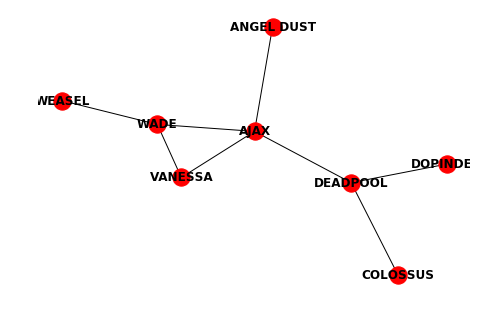

In [11]:
f = open('deadpool.txt', "r")
lines =[]
scene_delimiter = '#'
weight_delimiter = '\t'
node_delimiter = '-'
temp_line = ''

nodes = []
edges = []
weights = []

temp_lines = f.readlines()

for line in temp_lines:
    if line[-1] == '\n':
        lines.append(line[:-1])
    else:
        lines.append(line)
    
    
f.close()


# make Graph information
for line in lines:
    if '\t' in line:
        temp = line.split(weight_delimiter)
        temp_nodes = temp[0]
        temp_weight = temp[1]
        
        # add node
        temp_nodes = temp[0].split(node_delimiter)
        temp_node1 = temp_nodes[0]
        temp_node2 = temp_nodes[1]
        nodes.append(temp_node1)
        nodes.append(temp_node2)
        
        # add edge
        temp_edge = (temp_node1, temp_node2)
        edges.append(temp_edge)
        
        # add weight
        weights.append(temp_weight)

# 중복 node 제거
temp_set = set(nodes)
nodes = list(temp_set)


# print Graph information
print('nodes: ',nodes)
print('edges: ',edges)
print('weights: ',weights)


GG = nx.Graph()
GG.add_nodes_from(nodes)

for i in range(len(edges)):
    GG.add_edge(edges[i][0], edges[i][1], weight=weights[i])

nx.draw(GG, with_labels=True, font_weight='bold')

print(GG.edges.data())